# Notebook 05 - Decision Tree vs NN Evaluation

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset and preprocess

In [2]:
data = pd.read_csv(r"C:\Users\USER\PycharmProjects\ML\data\Telco-Customer-Churn.csv")
data.drop(columns=['customerID'], inplace=True)
data['Churn'] = data['Churn'].map({'Yes':1, 'No':0})
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_6052\2108580961.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [3]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
numerical_cols = data.select_dtypes(include=['int64','float64']).columns.tolist()
numerical_cols.remove('Churn')

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first'), categorical_cols)
])

X = data.drop('Churn', axis=1)
y = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre = preprocessor.transform(X_test)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_pre, y_train)

Decision Tree

Decision Tree Accuracy: 0.7175301632363378


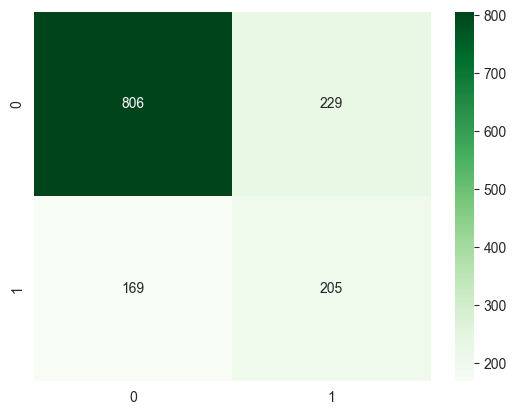

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1035
           1       0.47      0.55      0.51       374

    accuracy                           0.72      1409
   macro avg       0.65      0.66      0.65      1409
weighted avg       0.73      0.72      0.72      1409



In [4]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_res, y_train_res)
y_pred_dt = dt.predict(X_test_pre)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Greens')
plt.show()
print(classification_report(y_test, y_pred_dt))

NN results

In [5]:
y_pred_nn = rs_nn.predict(X_test_pre)
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
sns.heatmap(confusion_matrix(y_test, y_pred_nn), annot=True, fmt='d', cmap='Blues')
plt.show()
print(classification_report(y_test, y_pred_nn))

NameError: name 'rs_nn' is not defined

Compare ROC-AUC

In [ ]:
from sklearn.metrics import roc_auc_score
print("DT ROC-AUC:", roc_auc_score(y_test, dt.predict_proba(X_test_pre)[:,1]))
print("NN ROC-AUC:", roc_auc_score(y_test, rs_nn.predict_proba(X_test_pre)))